In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
# import yfinance as yf

# start = '2010-01-01'
# end = '2019-12-31'

# df = yf.download('AAPL', start=start, end=end, progress=False)

# print(df.head())


In [4]:
# import quandl
# import pandas as pd

# # Set your API key
# quandl.ApiConfig.api_key = "-7WzRvy-8HojobqNQ6sN"

# # Fetch Apple's stock data
# df = quandl.get("WIKI/AAPL", start_date="2024-01-01", end_date="2024-03-15")

# # Display the first 5 rows
# print(df.head())


In [5]:

df = pd.read_csv('Apple_Stock.csv')

print(df.head())


        Open       High        Low      Close     Volume  Dividends  \
0  28.753433  28.865097  28.451941  28.474274  183238000        0.0   
1  28.641769  28.675266  27.951687  28.116949  274780400        0.0   
2  28.389415  28.552443  28.255417  28.409513  150838800        0.0   
3  28.413980  28.594873  28.264349  28.293383  131369200        0.0   
4  28.259885  28.322416  27.554169  27.554169  206620800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [6]:
df = df.reset_index()
df.head()

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,28.753433,28.865097,28.451941,28.474274,183238000,0.0,0.0
1,1,28.641769,28.675266,27.951687,28.116949,274780400,0.0,0.0
2,2,28.389415,28.552443,28.255417,28.409513,150838800,0.0,0.0
3,3,28.413980,28.594873,28.264349,28.293383,131369200,0.0,0.0
4,4,28.259885,28.322416,27.554169,27.554169,206620800,0.0,0.0


In [7]:
# df = df.drop(['Date'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,28.753433,28.865097,28.451941,28.474274,183238000,0.0,0.0
1,1,28.641769,28.675266,27.951687,28.116949,274780400,0.0,0.0
2,2,28.389415,28.552443,28.255417,28.409513,150838800,0.0,0.0
3,3,28.413980,28.594873,28.264349,28.293383,131369200,0.0,0.0
4,4,28.259885,28.322416,27.554169,27.554169,206620800,0.0,0.0


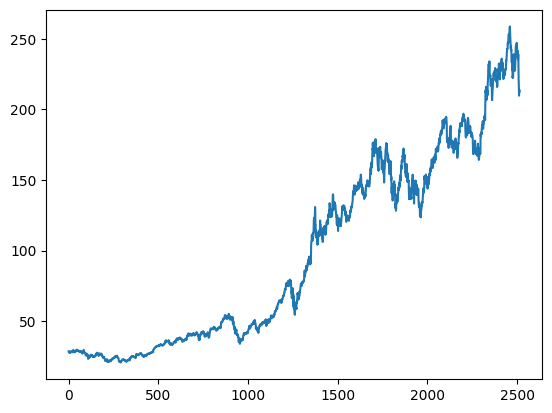

In [8]:
plt.plot(df.Close)

In [9]:
df

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,28.753433,28.865097,28.451941,28.474274,183238000,0.0,0.0
1,1,28.641769,28.675266,27.951687,28.116949,274780400,0.0,0.0
2,2,28.389415,28.552443,28.255417,28.409513,150838800,0.0,0.0
3,3,28.413980,28.594873,28.264349,28.293383,131369200,0.0,0.0
4,4,28.259885,28.322416,27.554169,27.554169,206620800,0.0,0.0
...,...,...,...,...,...,...,...,...
2510,2510,220.139999,221.750000,214.910004,216.979996,62547500,0.0,0.0
2511,2511,215.949997,216.839996,208.419998,209.679993,61368300,0.0,0.0
2512,2512,211.250000,213.949997,209.580002,213.490005,60107600,0.0,0.0
2513,2513,213.309998,215.220001,209.970001,214.000000,48073400,0.0,0.0


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2510    236.274568
2511    236.058658
2512    235.877156
2513    235.672317
2514    235.439610
Name: Close, Length: 2515, dtype: float64

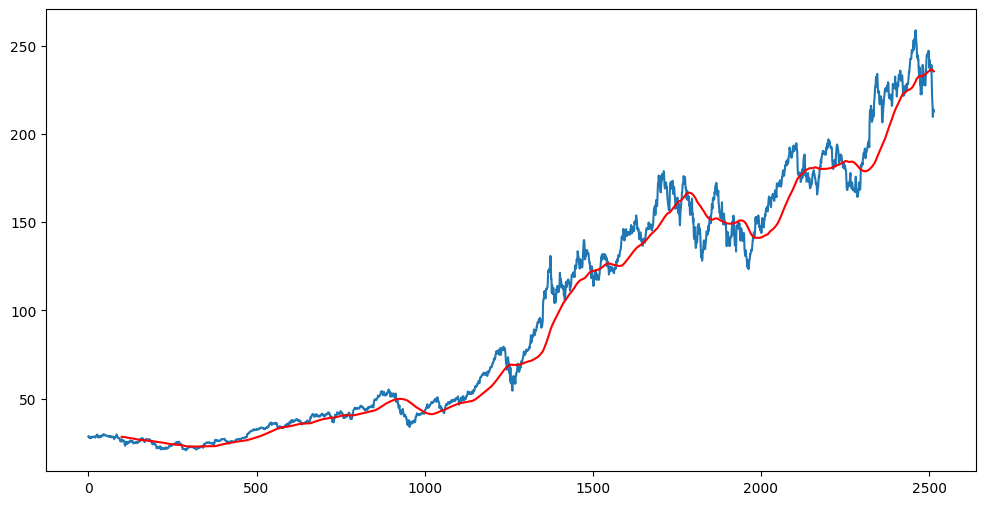

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2510    227.112243
2511    227.229373
2512    227.350105
2513    227.473337
2514    227.588524
Name: Close, Length: 2515, dtype: float64

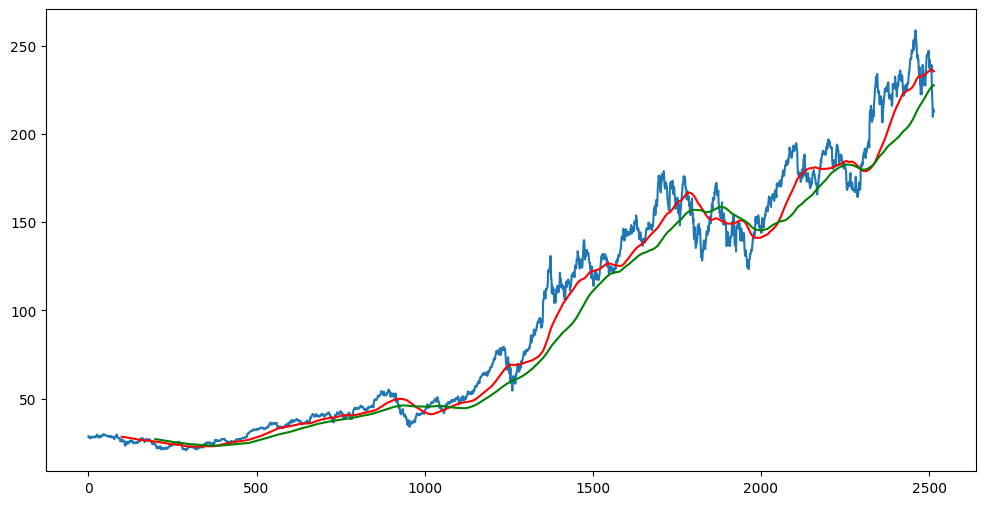

In [13]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2515, 8)

In [15]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


# Call the fit method on the scaler object with your training data
scaler.fit(data_training)

# Now, call the transform method on the scaler object to transform your data
data_training_array = scaler.transform(data_training)

print(data_training_array[1,0])
data_training_array

0.04704273991053609


array([[0.04930135],
       [0.04704274],
       [0.04889201],
       ...,
       [0.85533039],
       [0.83175579],
       [0.80619115]])

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train),np.array(y_train)


In [33]:
#ML Model
import tensorflow as tf


from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape =(x_train.shape[1], 1)) )
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True) )
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu') )
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs = 50,batch_size =32)

Epoch 1/50
52/52 [==============================] - 14s 201ms/step - loss: 0.0303
Epoch 2/50
52/52 [==============================] - 14s 279ms/step - loss: 0.0065
Epoch 3/50
52/52 [==============================] - 11s 215ms/step - loss: 0.0059
Epoch 4/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0049
Epoch 5/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0048
Epoch 6/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0044
Epoch 7/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0045
Epoch 8/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0038
Epoch 9/50
52/52 [==============================] - 20s 388ms/step - loss: 0.0044
Epoch 10/50
52/52 [==============================] - 14s 260ms/step - loss: 0.0038
Epoch 11/50
52/52 [==============================] - 13s 251ms/step - loss: 0.0039
Epoch 12/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0040
Epoch 13/50
5

In [37]:
model.save('keras_model.h5')

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
data_testing.head()

,Close
1760,152.617065
1761,157.045303
1762,158.058884
1763,161.365295
1764,162.742996


In [39]:
data_training.tail(100)

,Close
1660,146.479355
1661,146.695251
1662,145.919952
1663,145.870911
1664,146.538254
...,...
1755,154.929596
1756,160.351730
1757,155.992416
1758,152.262787


In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [42]:
final_df.head()

,Close
0,146.479355
1,146.695251
2,145.919952
3,145.870911
4,146.538254


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.69410594e-01],
       [1.71008025e-01],
       [1.65271544e-01],
       [1.64908682e-01],
       [1.69846390e-01],
       [1.66433517e-01],
       [1.93445216e-01],
       [1.73331519e-01],
       [1.67232176e-01],
       [1.74929176e-01],
       [1.85603139e-01],
       [1.81754809e-01],
       [1.85681379e-01],
       [1.79573117e-01],
       [1.82263539e-01],
       [1.61247879e-01],
       [1.60884678e-01],
       [1.76300806e-01],
       [1.76373401e-01],
       [1.83645329e-01],
       [2.01752218e-01],
       [2.33602498e-01],
       [2.53091177e-01],
       [2.56508904e-01],
       [2.59344742e-01],
       [2.63198830e-01],
       [2.25894321e-01],
       [2.50837003e-01],
       [2.87632217e-01],
       [2.83778129e-01],
       [2.76433492e-01],
       [2.62471750e-01],
       [2.87777633e-01],
       [3.30390391e-01],
       [3.58750574e-01],
       [3.54969081e-01],
       [3.90528259e-01],
       [3.63549979e-01],
       [3.53296458e-01],
       [3.89437526e-01],


In [44]:
input_data.shape

(855, 1)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [47]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 73ms/step


In [48]:
y_predicted.shape

(755, 1)

In [49]:
y_test

array([2.14823851e-01, 2.47588626e-01, 2.55088163e-01, 2.79552485e-01,
       2.89746168e-01, 3.14793170e-01, 3.24913807e-01, 3.53018723e-01,
       3.57751742e-01, 3.64158739e-01, 3.88623061e-01, 3.79958729e-01,
       3.56950374e-01, 3.54766198e-01, 3.84837165e-01, 3.60226863e-01,
       3.36708987e-01, 3.38966209e-01, 3.24039844e-01, 2.92440090e-01,
       3.06346962e-01, 3.26297066e-01, 2.89090780e-01, 2.87489059e-01,
       3.04453732e-01, 3.03216115e-01, 2.97318413e-01, 2.63606966e-01,
       2.71543653e-01, 2.27274644e-01, 2.25600102e-01, 2.77076687e-01,
       2.33463517e-01, 2.35720513e-01, 2.46787822e-01, 2.94406028e-01,
       2.27055956e-01, 2.32451928e-01, 1.94388839e-01, 2.12253781e-01,
       1.53846679e-01, 1.25117085e-01, 1.58294738e-01, 1.46846615e-01,
       1.73826250e-01, 1.12429314e-01, 8.71269305e-02, 8.88768901e-02,
       1.29127541e-01, 1.09075036e-01, 1.10241977e-01, 1.34012863e-01,
       1.76742812e-01, 1.70909350e-01, 1.69961549e-01, 1.88191047e-01,
      

In [50]:
y_predicted.shape

(755, 1)

In [51]:
scaler.scale_

array([0.00739905])

In [52]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

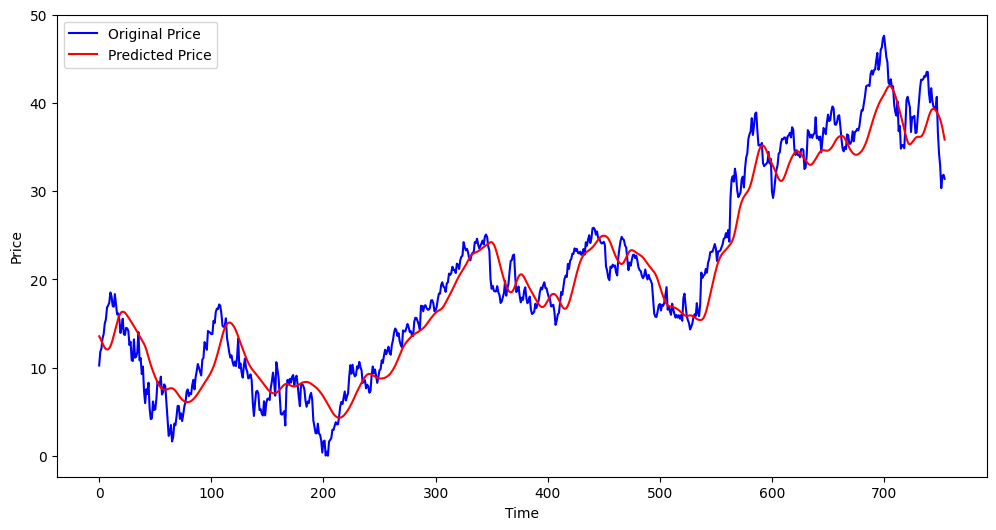

In [53]:
# Assuming y_test and y_predicted are arrays or DataFrames
# Reshape y_predicted if necessary

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
